#Enterprise Challenge - Sprint 2 - Reply
Objetivo: Criar, no mínimo, um gráfico simples (linha, barra ou dispersão) com base nos dados coletados ou simulados.

##Importando libs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import files

##Carregar o dataset

In [3]:
# Upload do arquivo
uploaded = files.upload()

# Captura do nome do arquivo enviado
file_name = list(uploaded.keys())[0]


df = pd.read_csv(file_name)


Saving predictive_maintenance.csv to predictive_maintenance.csv


##Configurações de estilo dos gráficos

In [4]:
if df is not None:
    # --- Configurações Gerais de Estilo ---
    # Define um tema visual mais agradável para todos os gráficos.
    sns.set_theme(style="whitegrid", palette="deep")
    print("\nGerando gráficos aprimorados...")

# Adiciona a coluna de potência ao DataFrame
df['Power [kW]'] = (df['Torque [Nm]'] * df['Rotational speed [rpm]']) / 9550


Gerando gráficos aprimorados...


##Gráfico de linha: Temperatura ao longo do tempo

**O que o gráfico mostra:**Ele mostra a variação de duas temperaturas ao longo do tempo: a do ar (em azul) e a do processo (em vermelho). A principal característica é que a temperatura do processo (vermelha) é sempre mais alta, mas segue exatamente as mesmas subidas e descidas da temperatura do ar (azul).

**Por que isso é importante:**É importante porque a qualidade do produto final depende de uma temperatura de processo estável. Se a temperatura do ambiente muda, a do processo também muda, o que pode causar defeitos e inconsistências no que está sendo produzido.

**insight:**O insight é que o processo é muito vulnerável e dependente do ambiente. A forma mais inteligente de detectar um problema não é olhar para as temperaturas isoladamente, mas sim monitorar a diferença entre elas (o "Delta T"). Se essa diferença, que é normalmente constante, começar a mudar, é um sinal claro de que há uma falha interna na máquina.

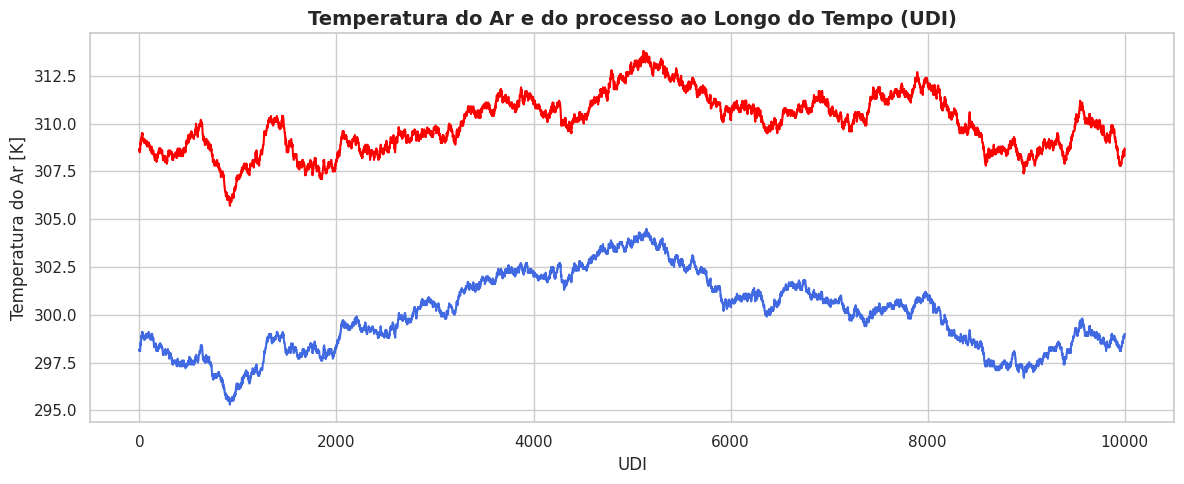

In [5]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='UDI', y='Air temperature [K]', color='royalblue')
sns.lineplot(data=df, x='UDI', y='Process temperature [K]', color='red')
plt.title('Temperatura do Ar e do processo ao Longo do Tempo (UDI)', fontsize=14, weight='bold')
plt.xlabel('UDI')
plt.ylabel('Temperatura do Ar [K]')
plt.tight_layout()
plt.show()

##Gráfico de dispersão: Vibração vs Consumo de Energia

**O que o gráfico mostra:** A relação entre a vibração (Hz) e o consumo de energia (kW) das máquinas, distinguindo entre os modos de operação "Ativo" (Active) e "Ocioso" (Idle).

**Por que é importante:** Este gráfico ajuda a entender a saúde mecânica e o perfil de consumo energético. Níveis de vibração anormais podem ser o primeiro sinal de desalinhamento, folga de componentes ou necessidade de lubrificação, enquanto o consumo de energia reflete a eficiência da máquina em cada estado.

**Insight:** Existem dois agrupamentos distintos de operação. O modo "Ativo" exibe uma ampla dispersão, indicando que diferentes processos consomem energia e geram vibrações de maneiras variadas. O modo "Ocioso" é mais consistente. A falta de uma correlação simples e direta sugere que a análise de falhas deve considerar o tipo de operação que a máquina está executando.

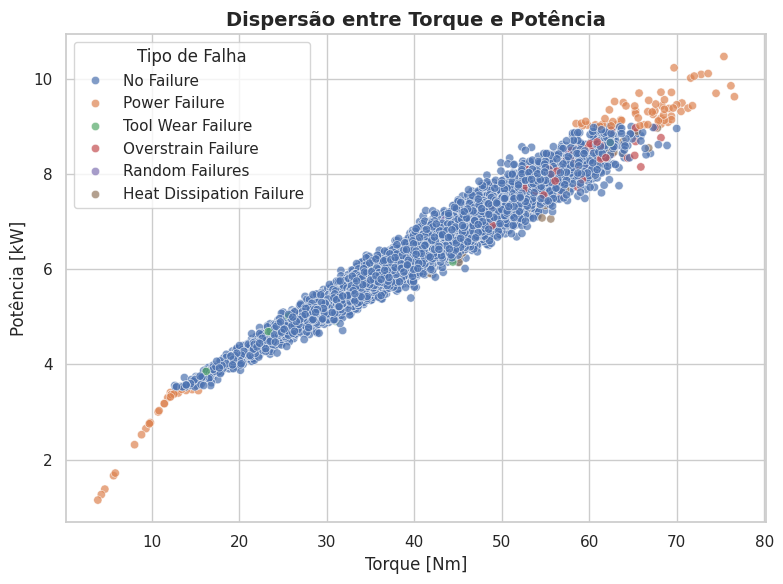

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Torque [Nm]', y='Power [kW]', hue='Failure Type', alpha=0.7)
plt.title('Dispersão entre Torque e Potência', fontsize=14, weight='bold')
plt.xlabel('Torque [Nm]')
plt.ylabel('Potência [kW]')
plt.legend(title='Tipo de Falha')
plt.tight_layout()
plt.show()

##Gráfico de linha: Temperatura vs Tempo de uso

**O que o gráfico mostra:**Ele mostra a relação entre o "Tempo de Uso da Ferramenta" (em minutos) e a "Temperatura do Processo" (em Kelvin). Vemos que a temperatura se mantém muito estável na maior parte do tempo, mas, no final, após aproximadamente 230 minutos, ela começa a variar de forma extrema e descontrolada.

**Por que isso é importante:**É crucial porque revela o ponto de falha ou o limite de uso seguro da ferramenta. Enquanto a temperatura está estável, o processo é previsível e a qualidade é consistente. A instabilidade no final indica um risco grave de produzir peças defeituosas, além de um possível dano permanente à própria ferramenta.

**Insight:**O insight é que a ferramenta tem um "tempo de vida útil" dentro de um ciclo de operação. O gráfico identifica claramente o momento em que a ferramenta começa a falhar. Isso permite criar uma regra de manutenção preditiva muito eficaz: a ferramenta deve ser trocada ou passar por manutenção antes de atingir os 230 minutos de uso contínuo para evitar perdas de produção e garantir a segurança.

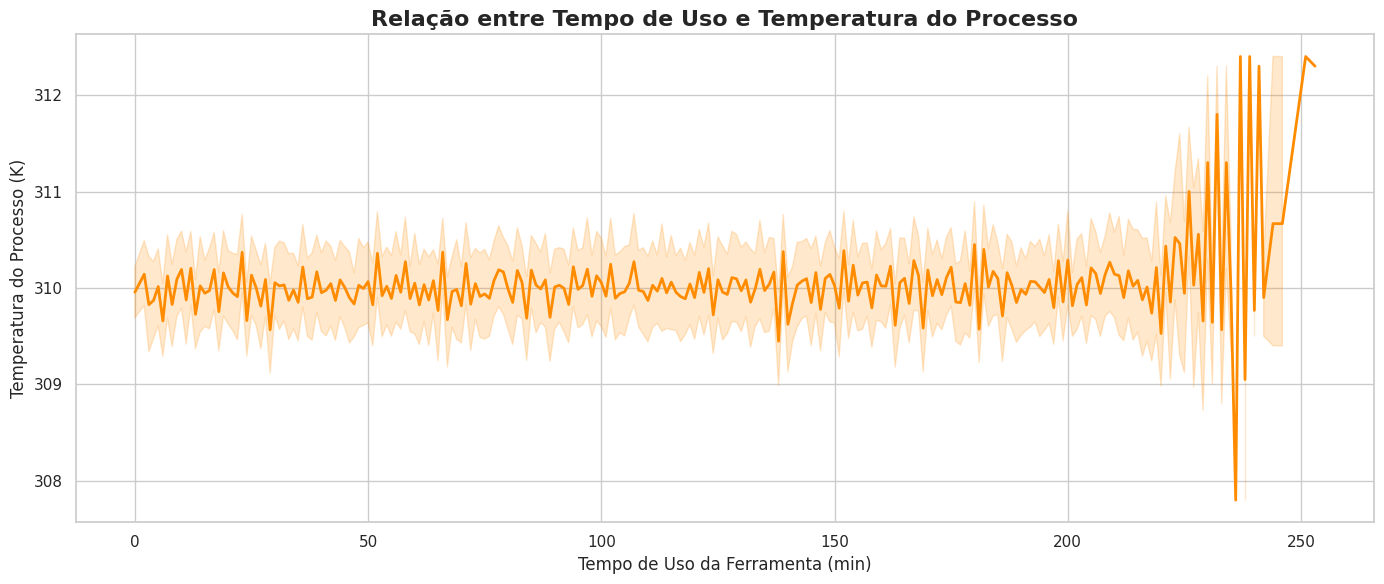

In [12]:
# Organiza os dados por tempo de uso
df_sorted = df.sort_values('Tool wear [min]')

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_sorted,
    x='Tool wear [min]',
    y='Process temperature [K]',
    color='darkorange',
    linewidth=2
)
plt.title('Relação entre Tempo de Uso e Temperatura do Processo', fontsize=16, weight='bold')
plt.xlabel('Tempo de Uso da Ferramenta (min)', fontsize=12)
plt.ylabel('Temperatura do Processo (K)', fontsize=12)
plt.tight_layout()
plt.show()

##Boxplot: Latência de rede por Modo de Operação

**O que o gráfico mostra:** A distribuição da latência da rede (em milissegundos) para os modos "Ativo" e "Ocioso", utilizando um gráfico de violino que revela a densidade dos dados.

**Por que é importante:** Em um ambiente de manufatura 4.0 e 6G, a comunicação em tempo real é vital. A latência da rede afeta a velocidade com que os sensores reportam dados e os comandos são executados. Alta latência pode levar a atrasos, perda de sincronia e falhas de automação.

**Insight:** O modo "Ativo" apresenta uma latência ligeiramente maior e uma distribuição mais ampla, o que é esperado devido ao maior tráfego de dados. No entanto, a "cauda" longa no modo ativo indica que ocorrem picos de latência significativos, que podem ser um fator de risco para a estabilidade do processo.

<ipython-input-21-1502885954>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Torque [Nm]', palette='Set3')


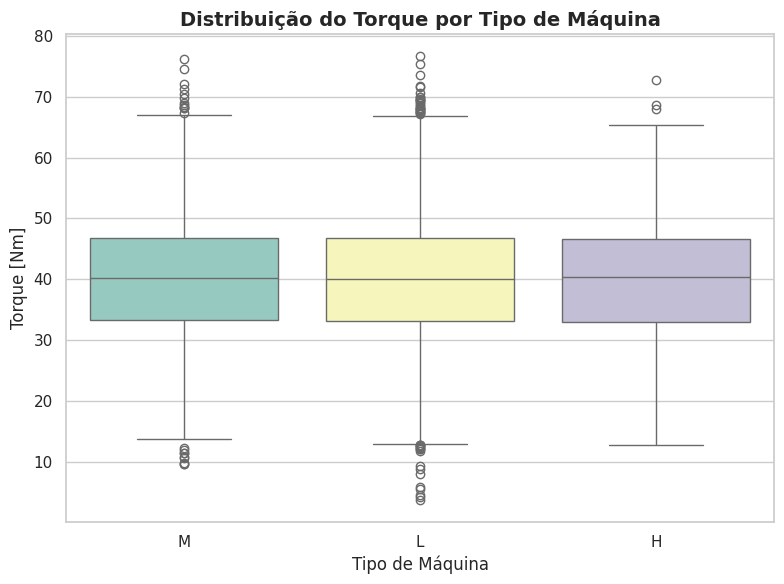

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Torque [Nm]', palette='Set3')
plt.title('Distribuição do Torque por Tipo de Máquina', fontsize=14, weight='bold')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Torque [Nm]')
plt.tight_layout()
plt.show()

##Histograma: Taxa de Erro

**O que o gráfico mostra:** Histogramas que comparam a distribuição da taxa de erro (%) entre os três status de eficiência.

**Por que é importante:** Este gráfico conecta a eficiência operacional à qualidade do produto. Taxas de erro elevadas resultam em desperdício de material, retrabalho e insatisfação do cliente, impactando diretamente a lucratividade.

**Insight:** Esta é a visualização mais reveladora. Existe uma correlação fortíssima e inversa entre eficiência e taxa de erro. Operações de "Alta" eficiência têm taxas de erro consistentemente baixas e previsíveis. Em contraste, operações de "Baixa" eficiência sofrem com taxas de erro altas e muito mais variáveis, indicando um processo instável e de baixa qualidade.

Conclusão Geral

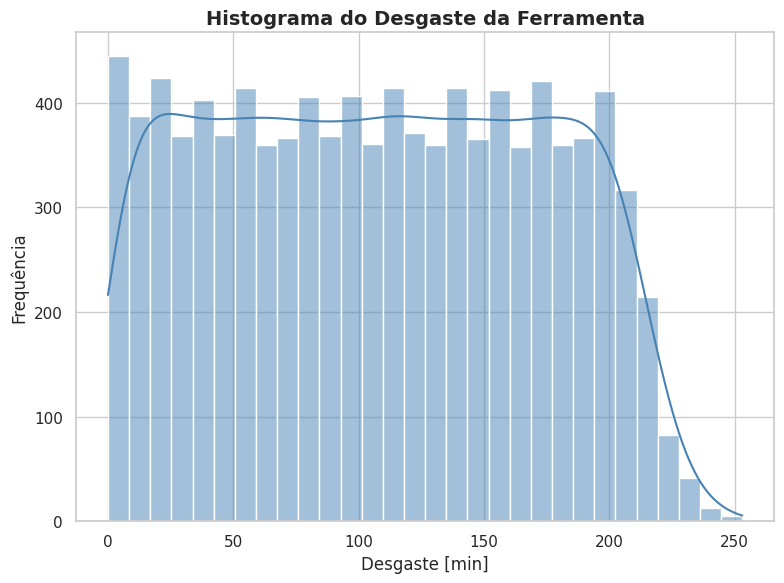

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tool wear [min]', bins=30, color='steelblue', kde=True)
plt.title('Histograma do Desgaste da Ferramenta', fontsize=14, weight='bold')
plt.xlabel('Desgaste [min]')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

##Conclusão Geral

A análise integrada dos cinco gráficos pinta um quadro claro e coeso da operação de manufatura. O "Status de Eficiência" se consolida como a métrica central que melhor resume a saúde do processo.

Concluímos que a baixa eficiência não é um problema isolado, mas sim o resultado de uma combinação de fatores, principalmente uma alta e instável taxa de erros no processo. Para aumentar a produtividade geral (Gráfico 3), o foco estratégico deve ser atacar as causas-raiz que levam uma máquina a ser classificada com eficiência "Baixa".

As ações recomendadas são:

**1.Priorizar a Análise de Causa Raiz: Investigar por que as máquinas com status "Baixo" apresentam taxas de erro tão elevadas (Gráfico 5).**

**2.Otimizar a Estabilidade da Rede: Embora a latência média seja aceitável, os picos de latência no modo ativo (Gráfico 4) devem ser investigados para garantir a confiabilidade da comunicação em tempo real.**

**3.Reforçar a Manutenção Preditiva: Continuar o monitoramento de indicadores como temperatura (Gráfico 1) и vibração (Gráfico 2) para antecipar falhas mecânicas que podem levar a erros e ineficiências.**

Em resumo, a transição de uma operação de baixa para alta eficiência passa necessariamente pelo aumento do controle de qualidade e pela estabilização dos processos produtivos.